In [1]:
#basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

# Libraries used for Modelling
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost import plot_importance
from xgboost import plot_tree
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

In [69]:
import warnings
import pandas as pd

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

## Importing Dataset

The dataset,  which is in csv format, is named 'listings.csv'. Based on the work done during Exploratory Analysis, we have concluded that the predictor variables that might have the greatest impact on price are:
- Room Type
- Property Type
- Number of Bedrooms
- Amenities
- Number of Reviews

As such, we single out these variables (together with price) to form a new dataframe.

In [70]:
listingDF =  pd.read_csv('D:\Projects\Airbnb_Seattle\data\listings.csv')

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Rutika\AppData\Local\Temp\ipykernel_14972\3498930984.py:1: SyntaxWarning: invalid escape sequence '\P'
  listingDF =  pd.read_csv('D:\Projects\Airbnb_Seattle\data\listings.csv')


In [71]:
newListingsDF = listingDF[['room_type','property_type','bedrooms','amenities','number_of_reviews', 'price']]
newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   room_type          3818 non-null   object 
 1   property_type      3817 non-null   object 
 2   bedrooms           3812 non-null   float64
 3   amenities          3818 non-null   object 
 4   number_of_reviews  3818 non-null   int64  
 5   price              3818 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 179.1+ KB


Data Cleaning

###  Amenities
- Displays the different types of amenities available for each listing

To clean the data in this variable: 
- Checking and listing down all the different amenities that were offered
- Separating the different amenities and creating a dedicated column for each amenity
- Removing amenities which have NULL values for all listings

In [72]:
#creating a set of all possible amenities
amenities_list = list(newListingsDF.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)

In [74]:
#creating column variables for each of the different amenities and adding them into the original dataframe
newListingsDF = newListingsDF.copy()
newListingsDF.loc[newListingsDF['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('TV'), 'tv'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Elevator'), 'elevator'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('parking'), 'parking'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

C:\Users\Rutika\AppData\Local\Temp\ipykernel_14972\2594824106.py:24: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  newListingsDF.loc[newListingsDF['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1


In [75]:
#replacing nulls with zeros for new columns
cols_to_replace_nulls = newListingsDF.iloc[:,41:].columns
newListingsDF[cols_to_replace_nulls] = newListingsDF[cols_to_replace_nulls].fillna(0)

#dropping the original amenities variable
newListingsDF.drop('amenities', axis=1, inplace=True)

In [76]:
#removing the amenities which have all NULL values for all listings
newListingsDF = newListingsDF.dropna(axis=1, how='all')
newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   room_type              3818 non-null   object 
 1   property_type          3817 non-null   object 
 2   bedrooms               3812 non-null   float64
 3   number_of_reviews      3818 non-null   int64  
 4   price                  3818 non-null   object 
 5   breakfast              291 non-null    float64
 6   tv                     2741 non-null   float64
 7   white_goods            3134 non-null   float64
 8   elevator               785 non-null    float64
 9   gym                    442 non-null    float64
 10  hot_tub_sauna_or_pool  159 non-null    float64
 11  internet               3692 non-null   float64
 12  pets_allowed           1169 non-null   float64
 13  secure                 727 non-null    float64
 14  accessible             300 non-null    float64
dtypes: f

### Property Type
- Displays the property type of a listing

To clean the data in this variable: 
- Grouping property types whose low counts might be insignificant and not provide us with enough information
- Thus, grouping property types that have counts that are < 30

In [8]:
newListingsDF.head()

room_type property_type  bedrooms  number_of_reviews    price  \
0  Entire home/apt     Apartment       1.0                207   $85.00   
1  Entire home/apt     Apartment       1.0                 43  $150.00   
2  Entire home/apt         House       5.0                 20  $975.00   
3  Entire home/apt     Apartment       0.0                  0  $100.00   
4  Entire home/apt         House       3.0                 38  $450.00   

   breakfast   tv  white_goods  elevator  gym  hot_tub_sauna_or_pool  \
0        NaN  1.0          1.0       NaN  NaN                    NaN   
1        NaN  1.0          1.0       NaN  NaN                    NaN   
2        NaN  1.0          1.0       NaN  NaN                    NaN   
3        NaN  NaN          1.0       NaN  NaN                    NaN   
4        NaN  1.0          NaN       NaN  NaN                    NaN   

   internet  pets_allowed  secure  accessible  
0       1.0           NaN     NaN         NaN  
1       1.0           NaN     1.0         NaN  
2       1.0           1.0     NaN         NaN  
3       1.0           NaN     1.0         NaN  
4       1.0           NaN     NaN         NaN

In [9]:
#checking to see the total number of each type of property 
newListingsDF.property_type.value_counts()

property_type
House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: count, dtype: int64

In [10]:
#grouping property types with less than <30 count into 'Other'
newListingsDF.loc[~newListingsDF.property_type.isin(['House', 'Apartment','Townhouse','Condominium','Loft',"Bed & Breakfast"]), 'property_type'] = 'Other'
newListingsDF.property_type.value_counts()

property_type
House              1733
Apartment          1708
Townhouse           118
Other                91
Condominium          91
Loft                 40
Bed & Breakfast      37
Name: count, dtype: int64

### Price
- Displays the price/cost of a listing

To clean the data in this variable: 
- Since the Price variable is currently a string (with the "$" symbol), the variable is thus converted into an integer 

In [11]:
newListingsDF.price = newListingsDF.price.str[1:-3]
newListingsDF.price = newListingsDF.price.str.replace(",", "")
newListingsDF.price = newListingsDF.price.astype('int64')
newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   room_type              3818 non-null   object 
 1   property_type          3818 non-null   object 
 2   bedrooms               3812 non-null   float64
 3   number_of_reviews      3818 non-null   int64  
 4   price                  3818 non-null   int64  
 5   breakfast              291 non-null    float64
 6   tv                     2741 non-null   float64
 7   white_goods            3134 non-null   float64
 8   elevator               785 non-null    float64
 9   gym                    442 non-null    float64
 10  hot_tub_sauna_or_pool  159 non-null    float64
 11  internet               3692 non-null   float64
 12  pets_allowed           1169 non-null   float64
 13  secure                 727 non-null    float64
 14  accessible             300 non-null    float64
dtypes: f

Ensuring that there are no NULL entries in the data

In [12]:
#to convert NaN values to 0 for preparation for Modelling
newListingsDF = newListingsDF.fillna(0)
#checking to ensure that there are no NULL entries
newListingsDF.isnull().sum()

room_type                0
property_type            0
bedrooms                 0
number_of_reviews        0
price                    0
breakfast                0
tv                       0
white_goods              0
elevator                 0
gym                      0
hot_tub_sauna_or_pool    0
internet                 0
pets_allowed             0
secure                   0
accessible               0
dtype: int64

## Regression Models

We will use regression models to help predict the price based on the significant predictor variables identified in Exploratory Analysis.
> - **Predictor Variables**: Room_type, Property_type, Bedrooms, Number_of_Reviews, Amenities
> - **Response Variable**: Price

The following regression models will be carried out:

- Linear Regression
- Ridge Regression
- Lasso Regression
- Random Forest Regression
- XGBoost
- CatBoost

### Data Preparation
The following will be done to the data to ensure its fit into the different regression models:
- Encoding the categorical variables so that it can be fit into the regression models
- Separating the data into predictor and response variables
- Separating the data into training and testing sets (Training Sets: Testing Sets = 80% : 20%)

In [13]:
#one-hot encode the Categorial variables
transformedDF = pd.get_dummies(newListingsDF, columns=['room_type','property_type'])

#renaming some categories to remove '/' and blank spaces
newTransformedDF = transformedDF.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Private room': 'room_type_Private_room'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Shared room': 'room_type_Shared_room'})
newTransformedDF =newTransformedDF.rename(columns={'property_type_Bed & Breakfast': 'property_type_Bed_and_Breakfast'})

newTransformedDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   bedrooms                         3818 non-null   float64
 1   number_of_reviews                3818 non-null   int64  
 2   price                            3818 non-null   int64  
 3   breakfast                        3818 non-null   float64
 4   tv                               3818 non-null   float64
 5   white_goods                      3818 non-null   float64
 6   elevator                         3818 non-null   float64
 7   gym                              3818 non-null   float64
 8   hot_tub_sauna_or_pool            3818 non-null   float64
 9   internet                         3818 non-null   float64
 10  pets_allowed                     3818 non-null   float64
 11  secure                           3818 non-null   float64
 12  accessible          

In [14]:
#separating X and y for Modelling
X = pd.DataFrame(newTransformedDF[["bedrooms", "breakfast", "tv", "white_goods", "elevator", "gym", "hot_tub_sauna_or_pool",
                              "internet", "pets_allowed", "secure", "accessible","number_of_reviews","room_type_Entire_home_apt",
                              "room_type_Private_room", "room_type_Shared_room", "property_type_Apartment",
                              "property_type_Bed_and_Breakfast", "property_type_Condominium", "property_type_House",
                              "property_type_Loft", "property_type_Other", "property_type_Townhouse"]]) #Predictor Variables
y = pd.DataFrame(newTransformedDF["price"]) #Response Variables

#scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [15]:
#splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Model 1: Linear Regression


In [16]:
#creating and fitting the model
linreg = LinearRegression()     
linreg.fit(X_train, y_train)

LinearRegression()

In [17]:
#coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print()

#print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

Intercept of Regression 	: b =  [128.26891575]

                         Predictors  Coefficients
0                          bedrooms     49.304338
1                         breakfast     -1.098287
2                                tv      1.449622
3                       white_goods     -0.270702
4                          elevator      8.724305
5                               gym      2.786614
6             hot_tub_sauna_or_pool      3.173831
7                          internet     -1.961610
8                      pets_allowed     -2.945201
9                            secure      0.591740
10                       accessible      0.065681
11                number_of_reviews     -4.063196
12        room_type_Entire_home_apt     13.728754
13           room_type_Private_room    -10.536449
14            room_type_Shared_room     -9.466042
15          property_type_Apartment     -3.022534
16  property_type_Bed_and_Breakfast      4.072323
17        property_type_Condominium      0.612647
18

**Note that**:
A positive coefficient indicates that as the predictor variable increases, the response variable also increases. 
A negative coefficient indicates that as the predictor variable increases, the response variable decreases.

In [18]:
#predict Response corresponding to Predictors
trainPredictionLR = linreg.predict(X_train)
testPredictionLR = linreg.predict(X_test)

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

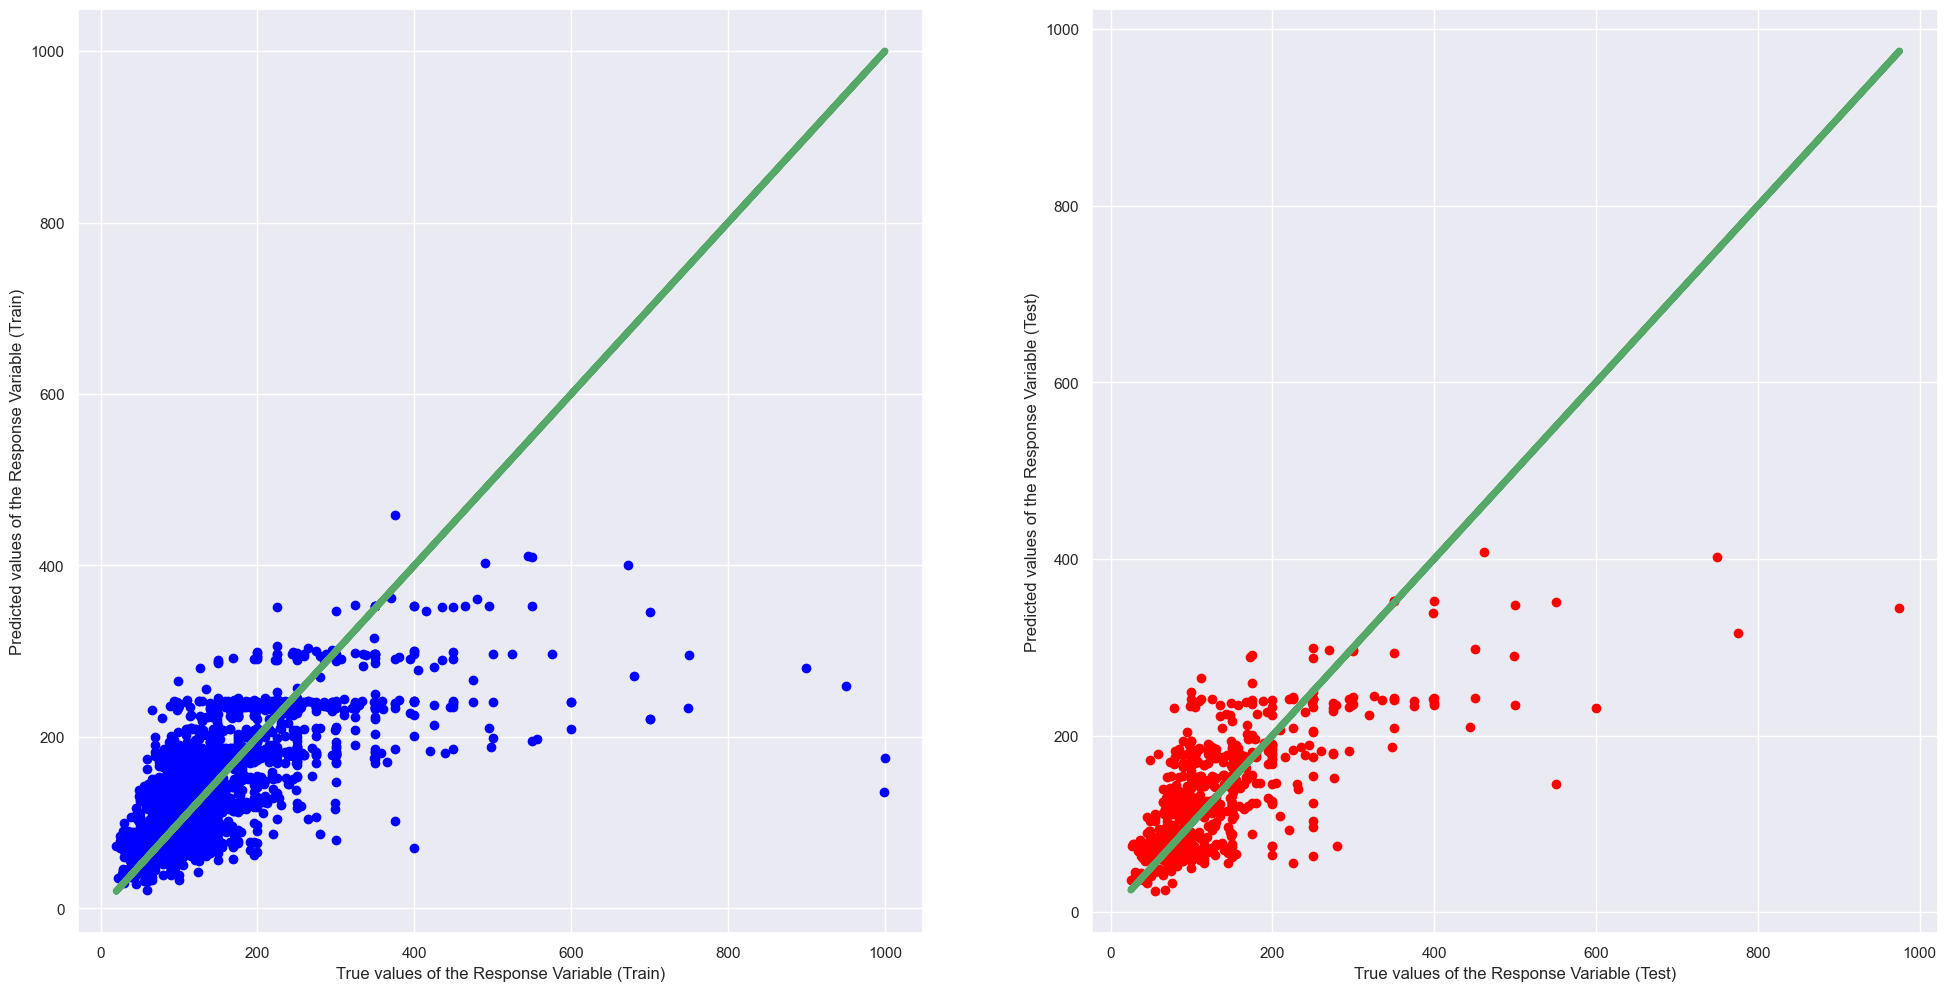

In [19]:
#plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLR, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionLR, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

**Note that**: Points that lie on or near the diagonal line means that the values predicted by the Linear Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted. 

### Model 2: Ridge Regression


Ridge Regression is meant to be an upgrade to linear regression. It is similar to linear regression where it can be used to for regression and classification.

Ridge Regression is good at handling overfitting.

The difference in the equation for Ridge Regression is that it penalize RSS by adding another term and search for the minimization.

We can iterate different $\lambda$ values as the additional term to find the best fit for a Ridge Regression model.

Ridge Regression does not drop any predictors unlike Lasso Regression, which is we will observe later on that the beta estimate will only converge to zero, but never reach zero.



In [20]:
#numpy array used for plotting Ridge and Lasson Regression later on
varArr = np.array(["bedrooms", "breakfast", "tv", "white_goods", "elevator", "gym", "hot_tub_sauna_or_pool",
"internet", "pets_allowed", "secure", "accessible","number_of_reviews","room_type_Entire_home_apt",
                              "room_type_Private room", "room_type_Shared_room", "property_type_Apartment",
                              "property_type_Bed_and_Breakfast", "property_type_Condominium", "property_type_House",
                              "property_type_Loft", "property_type_Other", "property_type_Townhouse"])

In [21]:
#initializing the model
ridgeReg = Ridge(alpha=0).fit(X_train,y_train) #alpha is the lambda value

#store the predictions for each lambda/alpha value
ridgeTrainPred = []
ridgeTestPred = []
ridgeR2score = [] # store all the R2 values
lambdaVal = [] #store all values of lambda
#for plotting
ridgeDF = pd.DataFrame({'variable': varArr, 'estimate': ridgeReg.coef_.ravel()})


lambdas = np.arange(0,2000,1) #lambda value of 0 to positive 2000, in intervals of 1

for alpha in lambdas:
    ridgeReg = Ridge(alpha=alpha)
    ridgeReg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridgeDF[var_name] = ridgeReg.coef_.ravel()
    #prediction
    ridgeTrainPred.append(ridgeReg.predict(X_train))
    ridgeTestPred.append(ridgeReg.predict(X_test))
    #storing the R2 scores and lambda value
    ridgeR2score.append(ridgeReg.score(X_train,y_train))
    lambdaVal.append(alpha)

ridgeDF = ridgeDF.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()


bestRidgeR2 = max(ridgeR2score)
print("The highest R2 value: ",bestRidgeR2)
print("The value of lambda that minimises: ",lambdaVal[ridgeR2score.index(bestRidgeR2)])


#Using the best fit Ridge Regression Model's predictions
trainPredictionRidge = ridgeTrainPred[ridgeR2score.index(bestRidgeR2)]
testPredictionRidge = ridgeTestPred[ridgeR2score.index(bestRidgeR2)]
ridgeDF.head()

C:\Users\Rutika\AppData\Local\Temp\ipykernel_14972\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\Rutika\AppData\Local\Temp\ipykernel_14972\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ridgeDF[var_name] = ridgeReg.coef_.ravel()
C:\Users\Rutika\AppData\Local\Temp\ipykernel_14972\325219664.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consi

The highest R2 value:  0.4998700762527166
The value of lambda that minimises:  1


variable          1   bedrooms  breakfast        tv  white_goods  elevator  \
0          estimate  49.904569  -0.564116  1.257908     0.123272  9.178254   
1         estimate0  49.904569  -0.564116  1.257908     0.123272  9.178254   
2         estimate1  49.284253  -1.098722  1.453121    -0.268352  8.717243   
3         estimate2  49.264188  -1.099158  1.456614    -0.266005  8.710193   
4         estimate3  49.244144  -1.099593  1.460102    -0.263662  8.703155   

variable       gym  hot_tub_sauna_or_pool  internet  pets_allowed  ...  \
0         2.810983               3.086848 -2.070166     -2.968065  ...   
1         2.810983               3.086848 -2.070166     -2.968065  ...   
2         2.789069               3.173965 -1.961208     -2.944777  ...   
3         2.791517               3.174098 -1.960804     -2.944354  ...   
4         2.793957               3.174232 -1.960400     -2.943930  ...   

variable  room_type_Entire_home_apt  room_type_Private room  \
0                     -7.810238e+14           -7.613301e+14   
1                     -7.810238e+14           -7.613301e+14   
2                      1.372922e+01           -1.053794e+01   
3                      1.372967e+01           -1.053943e+01   
4                      1.373013e+01           -1.054091e+01   

variable  room_type_Shared_room  property_type_Apartment  \
0                 -2.853113e+14             2.062506e+14   
1                 -2.853113e+14             2.062506e+14   
2                 -9.463328e+00            -3.024113e+00   
3                 -9.460616e+00            -3.025689e+00   
4                 -9.457907e+00            -3.027260e+00   

variable  property_type_Bed_and_Breakfast  property_type_Condominium  \
0                            4.063631e+13               6.327185e+13   
1                            4.063631e+13               6.327185e+13   
2                            4.070877e+00               6.128811e-01   
3                            4.069431e+00               6.131145e-01   
4                            4.067985e+00               6.133475e-01   

variable  property_type_House  property_type_Loft  property_type_Other  \
0                2.065201e+14        4.223486e+13         6.327185e+13   
1                2.065201e+14        4.223486e+13         6.327185e+13   
2                2.087212e-01        3.093392e+00         3.090550e+00   
3                2.114115e-01        3.091382e+00         3.088386e+00   
4                2.140974e-01        3.089375e+00         3.086224e+00   

variable  property_type_Townhouse  
0                    7.178802e+13  
1                    7.178802e+13  
2                    6.995989e-01  
3                    7.000877e-01  
4                    7.005751e-01  

[5 rows x 23 columns]

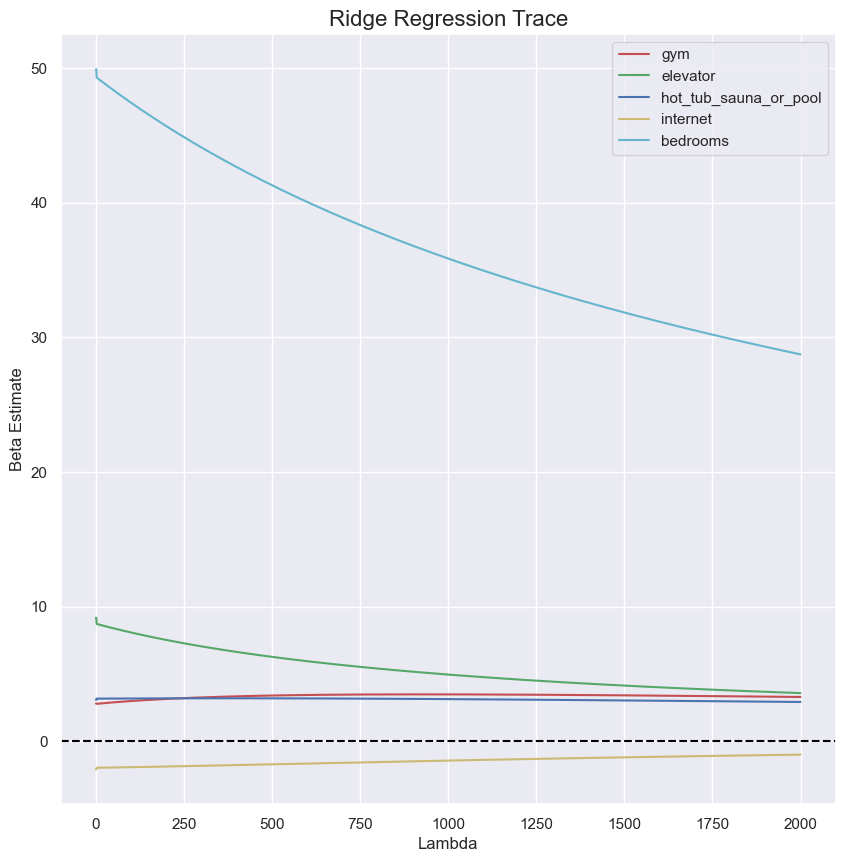

In [22]:
#plotting the Ridge Regression Trace
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(ridgeDF.gym,'r',ridgeDF.elevator,'g',ridgeDF.hot_tub_sauna_or_pool,'b',ridgeDF.internet,'y',ridgeDF.bedrooms,'c')
ax.axhline(y=0, color='black', linestyle='--')

ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['gym','elevator','hot_tub_sauna_or_pool','internet','bedrooms'])
ax.grid(True)

From this graph, we can see that the most important predictor among the 5 is <code>bedrooms</code>. For Ridge Regression, the beta estimate of each predictor will converge to zero (but will never reach zero) as lambda increases, the faster it converges to zero, the less important the predictor is. For this case, the most important predictor is <code>bedrooms</code>. The reason why the beta estimate does not reach zero is because Ridge Regression does not drop any predictors, unlike Lasso Regression, which we will observe later on.

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

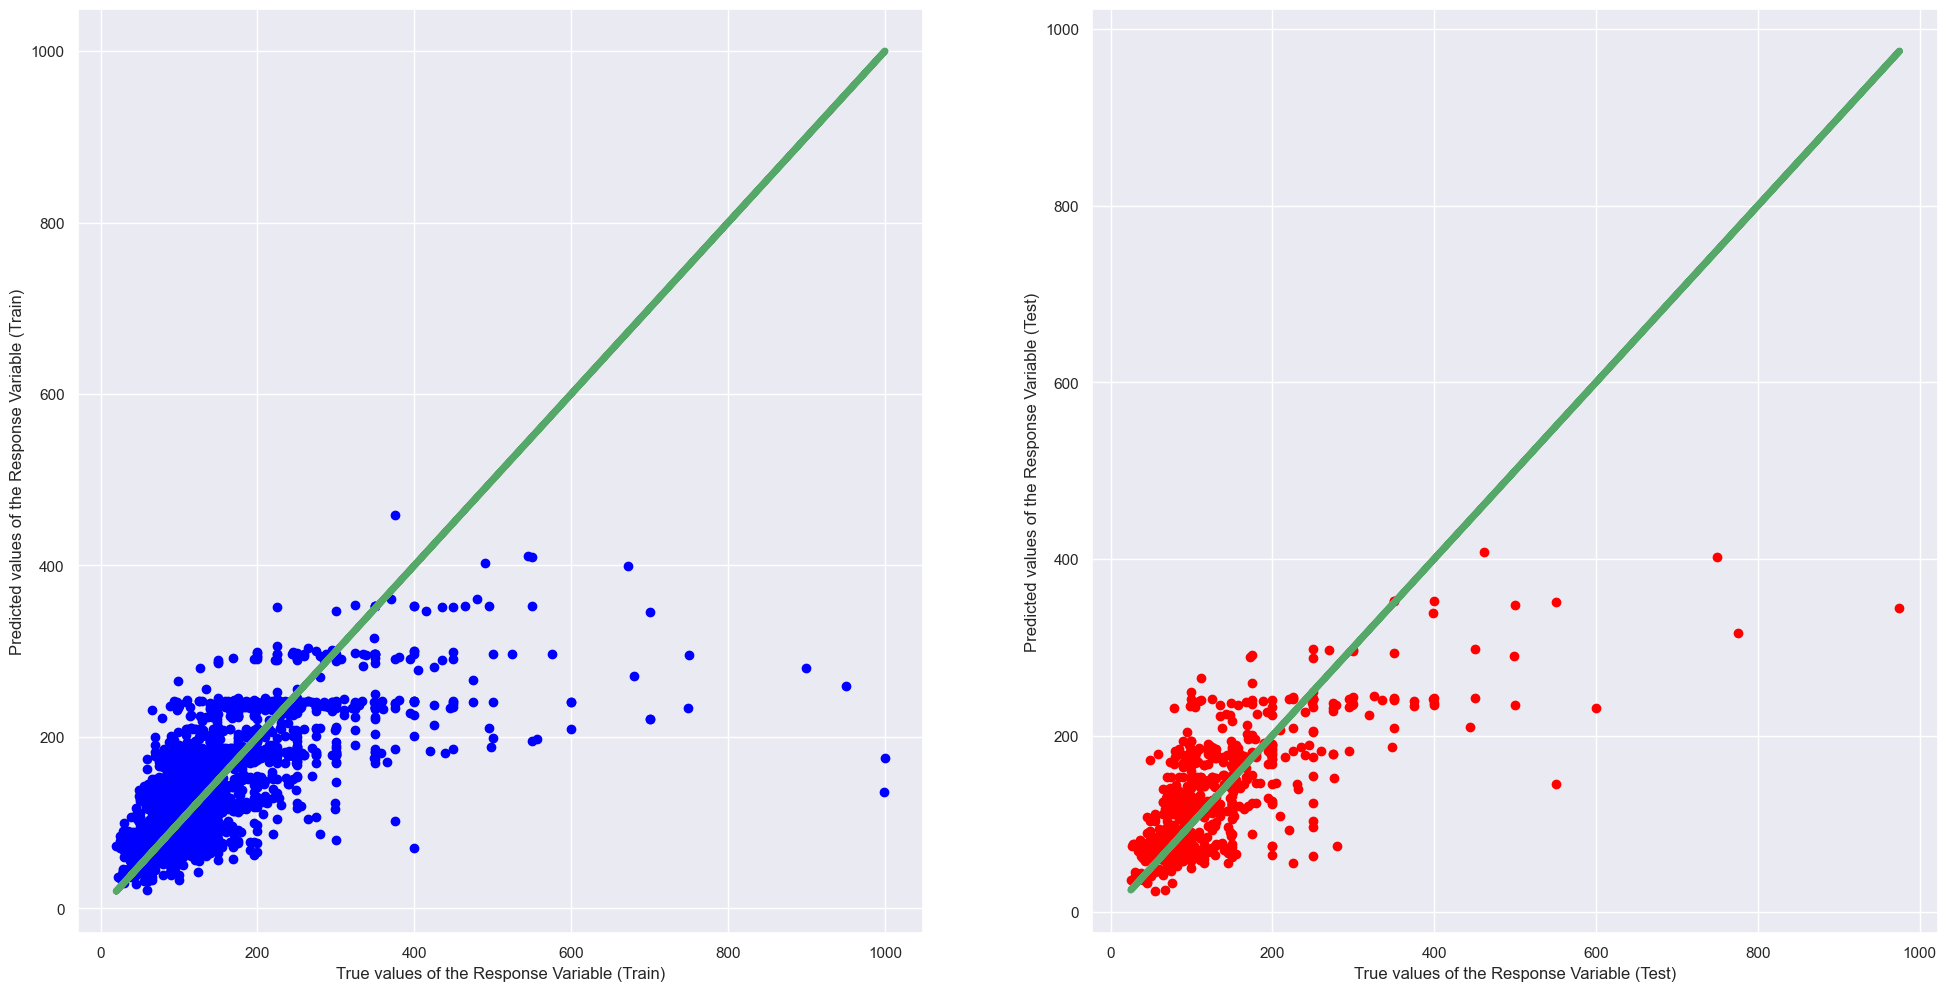

In [23]:
#plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionRidge, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionRidge, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

**Note that**: Points that lie on or near the diagonal line means that the values predicted by the Ridge Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted. 

### Model 3: Lasso Regression

Lasso Regression is similar to Ridge Regression, meant to be an upgrade to linear regression, it also can be used for Regression and Classification.

Lasso Regression can be used for feature selection, where some predictors will be dropped after a lambda reaches a certain value.

Lasson Regression also requires a $\lambda$ value to be iterated to find the best fit.


In [24]:
#initialising the model
lassoReg = Lasso(alpha=1)
lassoReg.fit(X_train, y_train)
#stores prediction
lassoTrainPred = []
lassoTestPred = []
lassoR2score=[] #stores R2 value
lassoDF = pd.DataFrame({'variable': varArr, 'estimate': lassoReg.coef_.ravel()})

lambdas = np.arange(0.01, 8.01, 0.02)#lambda value of 0.01 to 8.01, in intervals of 0.02

for alpha in lambdas:
    lassoReg = Lasso(alpha=alpha)
    lassoReg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    lassoDF[var_name] = lassoReg.coef_.ravel()
    #prediction
    lassoTrainPred.append(lassoReg.predict(X_train))
    lassoTestPred.append(lassoReg.predict(X_test))
    #storing the r2 score 
    lassoR2score.append(lassoReg.score(X_train,y_train))


bestLassoR2 = max(lassoR2score)
print("The highest R2 value: ",bestLassoR2)


#Using the best fit Lasso Regression Model's predictions
trainPredictionLasso = lassoTrainPred[lassoR2score.index(bestLassoR2)]
testPredictionLasso = lassoTestPred[lassoR2score.index(bestLassoR2)]

lassoDF = lassoDF.set_index('variable').T.rename_axis('estimate').rename_axis(1).reset_index()

lassoDF.head()

C:\Users\Rutika\AppData\Local\Temp\ipykernel_14972\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\Rutika\AppData\Local\Temp\ipykernel_14972\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\Rutika\AppData\Local\Temp\ipykernel_14972\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Co

The highest R2 value:  0.4998699105801089


C:\Users\Rutika\AppData\Local\Temp\ipykernel_14972\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\Rutika\AppData\Local\Temp\ipykernel_14972\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  lassoDF[var_name] = lassoReg.coef_.ravel()
C:\Users\Rutika\AppData\Local\Temp\ipykernel_14972\2473200036.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Co

variable                             1   bedrooms  breakfast        tv  \
0                             estimate  48.790138  -0.000000  0.733181   
1                         estimate0.01  49.297808  -1.086892  1.441895   
2                         estimate0.03  49.285031  -1.064207  1.426546   
3         estimate0.049999999999999996  49.272586  -1.041646  1.411322   
4          estimate0.06999999999999999  49.259253  -1.018753  1.395764   

variable  white_goods  elevator       gym  hot_tub_sauna_or_pool  internet  \
0           -0.000000  7.686669  2.659453               2.651592 -0.866189   
1           -0.259838  8.715156  2.785768               3.168505 -1.951887   
2           -0.238049  8.696649  2.784090               3.157818 -1.932433   
3           -0.216188  8.677894  2.782431               3.147090 -1.912968   
4           -0.194519  8.659800  2.780722               3.136473 -1.893531   

variable  pets_allowed  ...  room_type_Entire_home_apt  \
0            -1.960958  ...                  23.983891   
1            -2.935492  ...                  24.532887   
2            -2.916075  ...                  24.522789   
3            -2.896656  ...                  24.512268   
4            -2.877240  ...                  24.502879   

variable  room_type_Private room  room_type_Shared_room  \
0                           -0.0              -4.630837   
1                           -0.0              -5.509280   
2                           -0.0              -5.492949   
3                           -0.0              -5.476669   
4                           -0.0              -5.460251   

variable  property_type_Apartment  property_type_Bed_and_Breakfast  \
0                       -1.710013                         2.623006   
1                       -3.214187                         4.018392   
2                       -3.185626                         3.991638   
3                       -3.156657                         3.964922   
4                       -3.128783                         3.938108   

variable  property_type_Condominium  property_type_House  property_type_Loft  \
0                          0.155203                 -0.0            2.212459   
1                          0.545286                 -0.0            3.045043   
2                          0.536907                 -0.0            3.028659   
3                          0.528648                 -0.0            3.012353   
4                          0.520068                 -0.0            2.995836   

variable  property_type_Other  property_type_Townhouse  
0                    1.932181                 0.000000  
1                    3.019318                 0.617499  
2                    2.998854                 0.597513  
3                    2.978496                 0.577525  
4                    2.957853                 0.557540  

[5 rows x 23 columns]

C:\Users\Rutika\AppData\Local\Temp\ipykernel_14972\2144987329.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(-1, 100, 1))


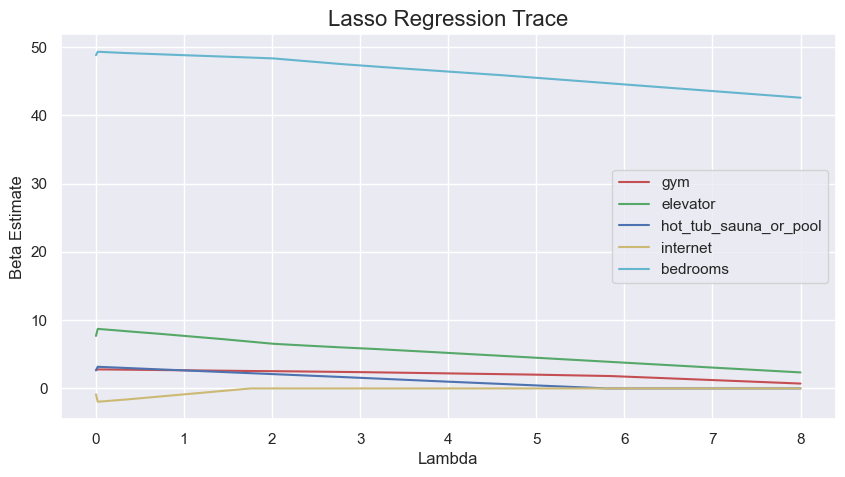

In [25]:
#Plot the Lasso Regression Trace
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lassoDF.gym,'r',lassoDF.elevator,'g',lassoDF.hot_tub_sauna_or_pool,'b',lassoDF.internet,'y',lassoDF.bedrooms,'c')
ax.set_xlabel("Lambda")
ax.set_xticklabels(np.arange(-1, 100, 1))
ax.set_ylabel("Beta Estimate")
ax.set_title("Lasso Regression Trace", fontsize=16)
ax.legend(labels=['gym','elevator','hot_tub_sauna_or_pool','internet','bedrooms'])
ax.grid(True)


From this graph, we can see that the most important predictor among the 5 is also <code>bedrooms</code>. For Lasso Regression, the faster the beta estimate of the predictor reaches zero (the predictor has been dropped) as lambda increases, the less important the predictor is. As we can see from the graph, <code>bedrooms</code> does not even hit zero after when has reached its highest value of 8, compared to the beta estimate of <code>hot_tub_sauna_or_pool</code> which reached zero a lot faster than <code>bedrooms</code>.

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

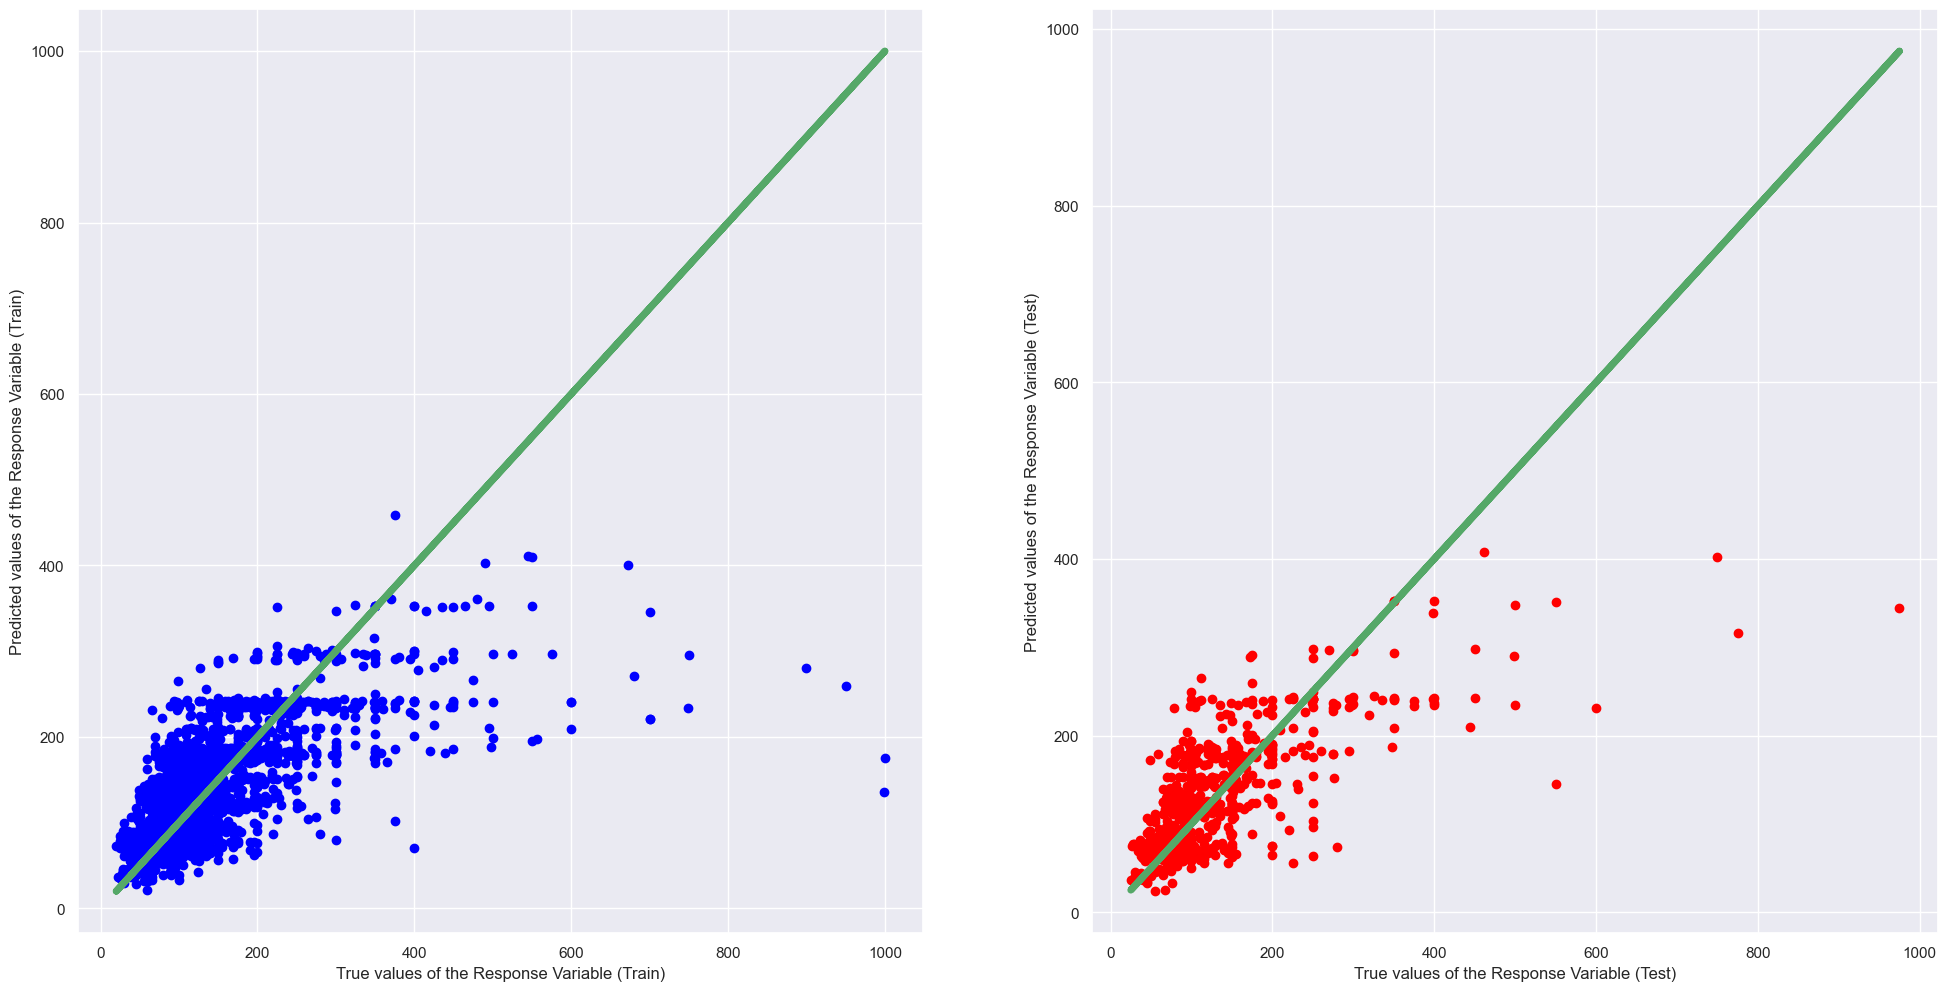

In [26]:
#plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLasso, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionLasso, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

**Note that**: Points that lie on or near the diagonal line means that the values predicted by the Lasso Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted. 

### Model 4: Random Forest Regression

Random Forest is an emsemble technique that is able to perform both Regression and Classification tasks with the use of multiple decision trees and a technique that is called Bootstrap Aggression. The idea behind this technique is to combine multiple decision trees in its prediction rather than replying on individual decision trees. 

Here, we use the RandomForestRegressor to help predict the price.

In [27]:
# Tuning of Parameters

# random_grid = {'n_estimators': [2000],
#                'max_features': [2,5],
#                'max_depth': [40,70],
#                'min_samples_split': [40,50],
#                'max_leaf_nodes':[50,70],
#                'max_features': [2,5]}
# rf_tune = RandomForestRegressor()
# rf_random = GridSearchCV(estimator = rf_tune, param_grid = random_grid, cv = 3, verbose=2,n_jobs = 2)

# rf_random.fit(X_train,y_train)

# print(rf_random.best_estimator_)

To optimize the parameters used in the Random Forest Regression modelling algorithm, we first tune the parameters - in which GridSearchCV was used to optimize the parameters to determine the values that impact the model in order to enable the algorithm to perform at its best. In this case, while we managed to get the optimal parameter values (for at least the more significant parameters), we commented off the code as it would take a decent amount of time to process. The output of the code is as follows:

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features=5, max_leaf_nodes=30,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=2000,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [28]:
#creating and fitting the model
RF = RandomForestRegressor(n_estimators=2000, max_depth=40,min_samples_split = 50,
                           max_leaf_nodes = 70,max_features = 5).fit(X_train,y_train)

# predicting the training and testing sets
trainPredictin_RF = RF.predict(X_train)
testPredictin_RF =RF.predict(X_test)

d:\Projects\Airbnb_Seattle\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [29]:
importancesRF = RF.feature_importances_
feat_imp1 = pd.DataFrame(importancesRF, columns=['Weight'], index=X_train.columns)
feat_imp1.sort_values('Weight', inplace=True)
feat_imp1

Weight
property_type_Bed_and_Breakfast  0.002062
property_type_Townhouse          0.003010
property_type_Loft               0.003691
property_type_Condominium        0.003969
accessible                       0.004316
breakfast                        0.004806
pets_allowed                     0.005039
property_type_Other              0.005269
internet                         0.005763
secure                           0.005803
white_goods                      0.008883
hot_tub_sauna_or_pool            0.014457
room_type_Shared_room            0.015009
gym                              0.017503
elevator                         0.018150
property_type_House              0.025874
tv                               0.026097
property_type_Apartment          0.029987
number_of_reviews                0.045812
room_type_Private_room           0.084515
room_type_Entire_home_apt        0.144119
bedrooms                         0.525867

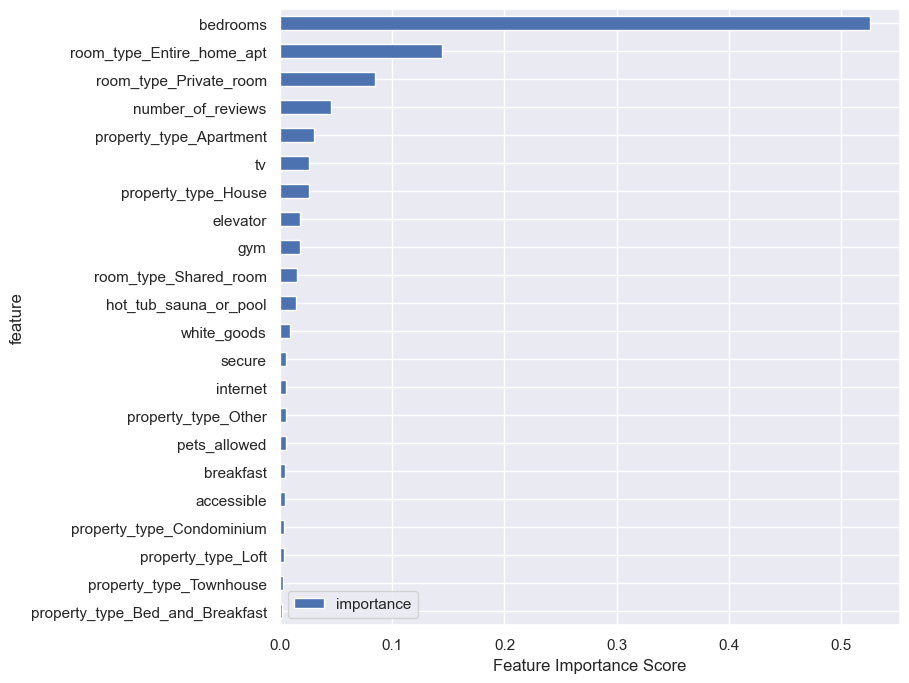

In [30]:
feat_imp = pd.DataFrame({'importance':RF.feature_importances_})  
feat_imp['feature'] = X_train.columns
feat_imp.sort_values(by='importance', ascending=False, inplace=True)

feat_imp.sort_values(by='importance', inplace=True)
feat_imp = feat_imp.set_index('feature', drop=True)
feat_imp.plot.barh(figsize=(8,8))
plt.xlabel('Feature Importance Score')
plt.show()

Importance provides a score that indicates how useful or valuable each feature was in the construction of the decision trees within the model. The more a variable is used to make key decisions with decision trees, the higher its relative importance.

As such, feature importance can be used to interpret our data to understand the most important features that define our predictions. In this case, looking at the bar chart above, the predictor variable that is associated with a taller bar means that the variable has a higher importance in the Random Tree Regression Model in predicting price. 

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

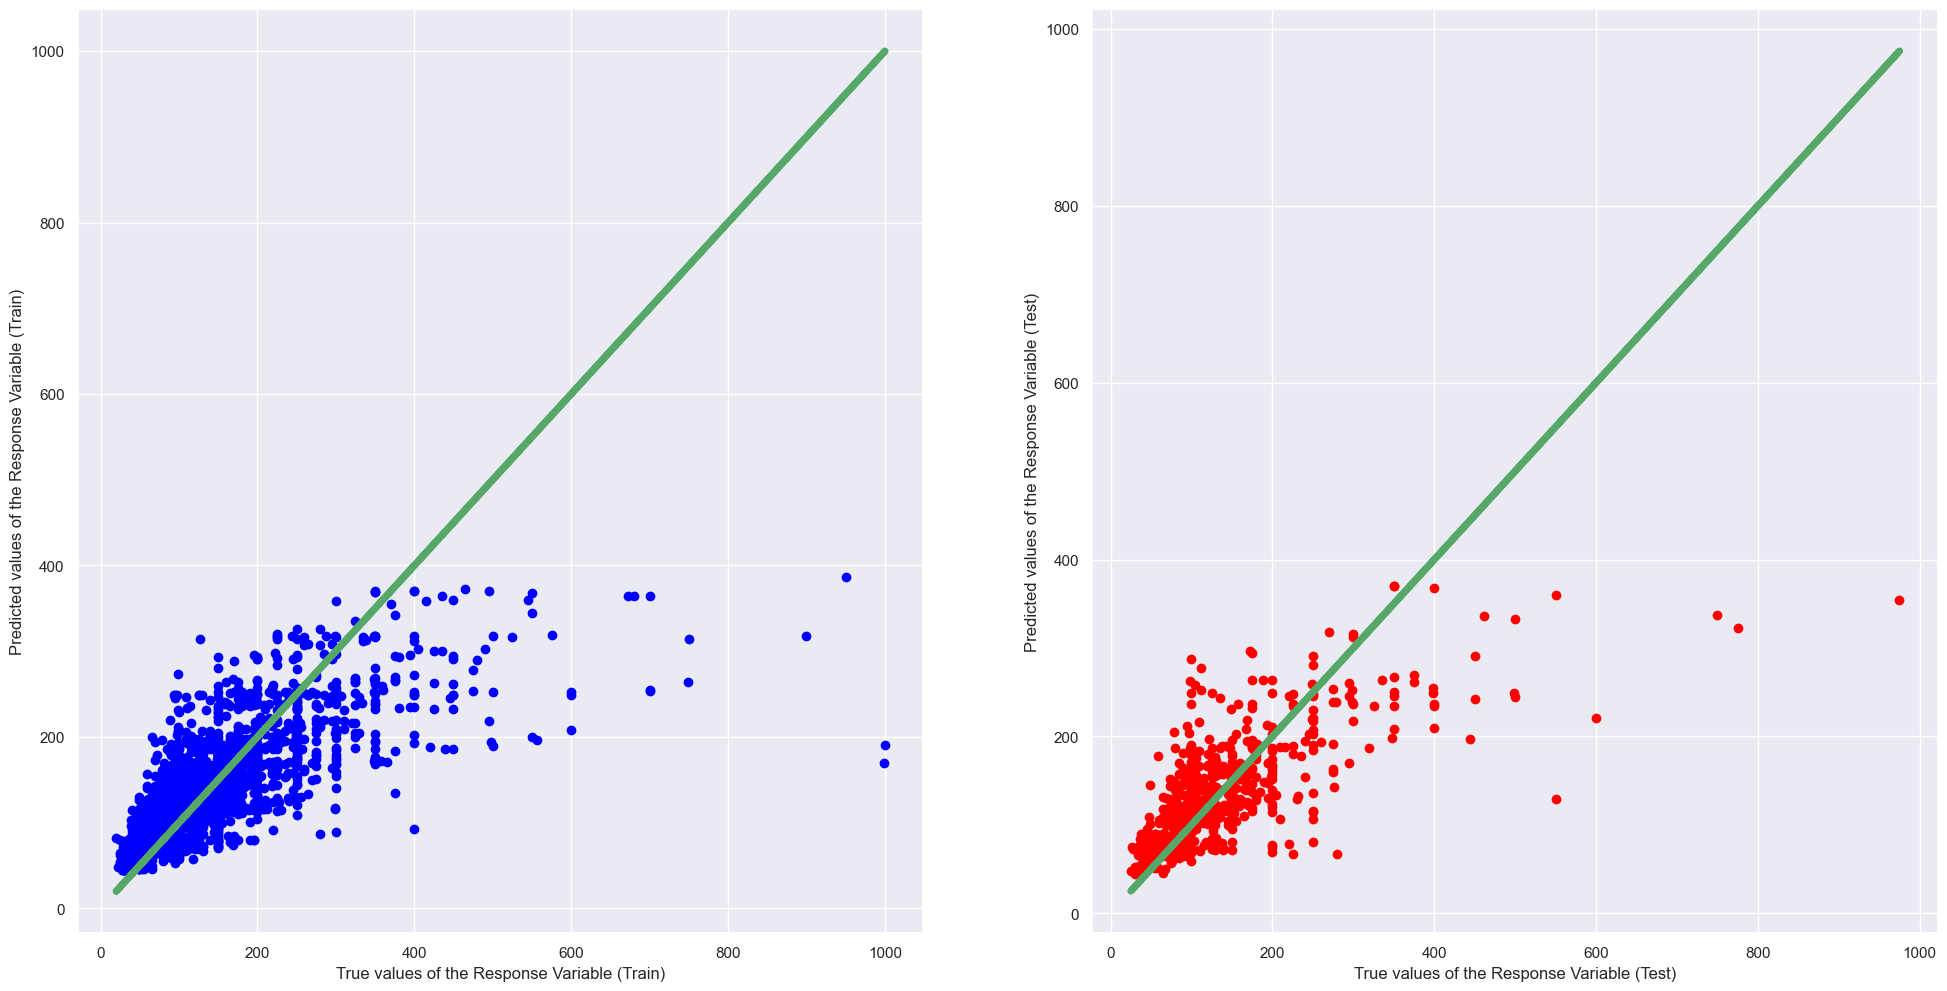

In [31]:
#plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictin_RF, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictin_RF, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

**Note that**: Points that lie on or near the diagonal line means that the values predicted by the Random Forest Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted. 

### Model 5 : XGBoost

XGBoost is an open source library that provides a high-performance implementation of gradient boost decision trees (similar to the decision trees that we have learnt). It is a machine learning model that is able to perform prediction tasks regardless of Regression or Classification. 

The key idea of Gradient Boosted Decision Trees is that they build a series of trees in which each tree is trained so that it attempts to correct the mistakes of the previous tree in the seroes.

In [33]:
#Tuning the Parameters

# parameters_for_testing = {
#     'colsample_bytree':[0.3,0.5],
#     'learning_rate':[0.1,0.5],
#     'alpha': [10,12],
#     'max_depth':[3,5],
#     'n_estimators':[2000],  
# }

                    
# xgb_model = xgb.XGBRegressor(learning_rate =0.1, n_estimators=1000, max_depth=5,
#      gamma=0, colsample_bytree=0.8)

# gsearch1 = GridSearchCV(estimator = xgb_model, param_grid = parameters_for_testing, n_jobs=6,iid=False, verbose=10,scoring='neg_mean_squared_error')
# gsearch1.fit(X_train,y_train)

# print(gsearch1.best_estimator_)

To optimize the parameters used in the XGBoost modelling algorithm, we first tune the parameters - in which GridSearchCV was used to optimize the parameters to determine the values that impact the model in order to enable the algorithm to perform at its best. In this case, while we managed to get the optimal parameter values (for at least the more significant parameters), we commented off the code as it would take a decent amount of time to process. The output of the code is as follows:

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [32]:
#fitting and Training the model for Train & Test sets
xgb_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 2000)

xgb_reg.fit(X_train,y_train)

#predicting using the model
trainPredictin_xgb_reg = xgb_reg.predict(X_train)
testPredictin_xgb_reg = xgb_reg.predict(X_test)

d:\Projects\Airbnb_Seattle\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:24:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\objective\regression_obj.cu:282: reg:linear is now deprecated in favor of reg:squarederror.
  bst.update(dtrain, iteration=i, fobj=obj)


In [33]:
import os, shutil, sys

#update with your actual unzip location
GV_BIN = r"C:\Users\Rutika\Downloads\Graphviz-14.0.2-win64\bin"

#Add Graphviz bin to PATH for *this* Python session
os.environ["PATH"] = GV_BIN + os.pathsep + os.environ.get("PATH", "")

#Sanity checks
print("dot found at:", shutil.which("dot"))


dot found at: None


In [38]:
import os, shutil

#put YOUR real Graphviz bin path here:
GV_BIN = r"C:\Users\Rutika\Downloads\windows_10_cmake_Release_Graphviz-14.0.2-win64\Graphviz-14.0.2-win64\bin"

#Make dot.exe visible to this Python process
os.environ["PATH"] = GV_BIN + os.pathsep + os.environ.get("PATH", "")
os.environ["GRAPHVIZ_DOT"] = os.path.join(GV_BIN, "dot.exe")

print("dot found at:", shutil.which("dot"))  # should print a full path

dot found at: C:\Users\Rutika\Downloads\windows_10_cmake_Release_Graphviz-14.0.2-win64\Graphviz-14.0.2-win64\bin\dot.EXE


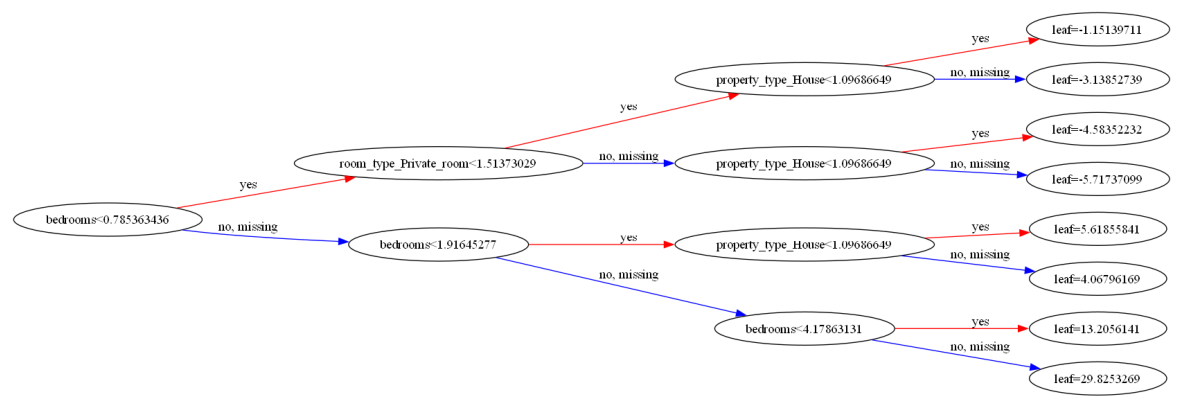

In [39]:
#ploting decision tree 
xgb.plot_tree(xgb_reg, num_trees=0, rankdir='LR')
fig = plt.gcf()
fig.set_size_inches(15, 20)

In [40]:
# Weightage/Importance of each variable 
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

weight
property_type_Townhouse          0.006503
breakfast                        0.007865
property_type_Loft               0.008313
accessible                       0.009198
property_type_Bed_and_Breakfast  0.010326
internet                         0.013031
white_goods                      0.013868
secure                           0.013900
property_type_Condominium        0.015422
property_type_Other              0.015731
pets_allowed                     0.017343
number_of_reviews                0.023689
property_type_House              0.024870
tv                               0.024885
gym                              0.025123
hot_tub_sauna_or_pool            0.028740
elevator                         0.041255
property_type_Apartment          0.052418
room_type_Shared_room            0.069603
room_type_Private_room           0.123120
room_type_Entire_home_apt        0.187717
bedrooms                         0.267078

Importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more a variable is used to make key decisions with decision trees, the higher its relative importance.

As such, feature importance can be used to interpret our data to understand the most important features that define our predictions. In this case, looking at the table above, the predictor variable that is associated with a higher number means that the variable has a higher importance in the XGBoost Regression Model in predicting price. 

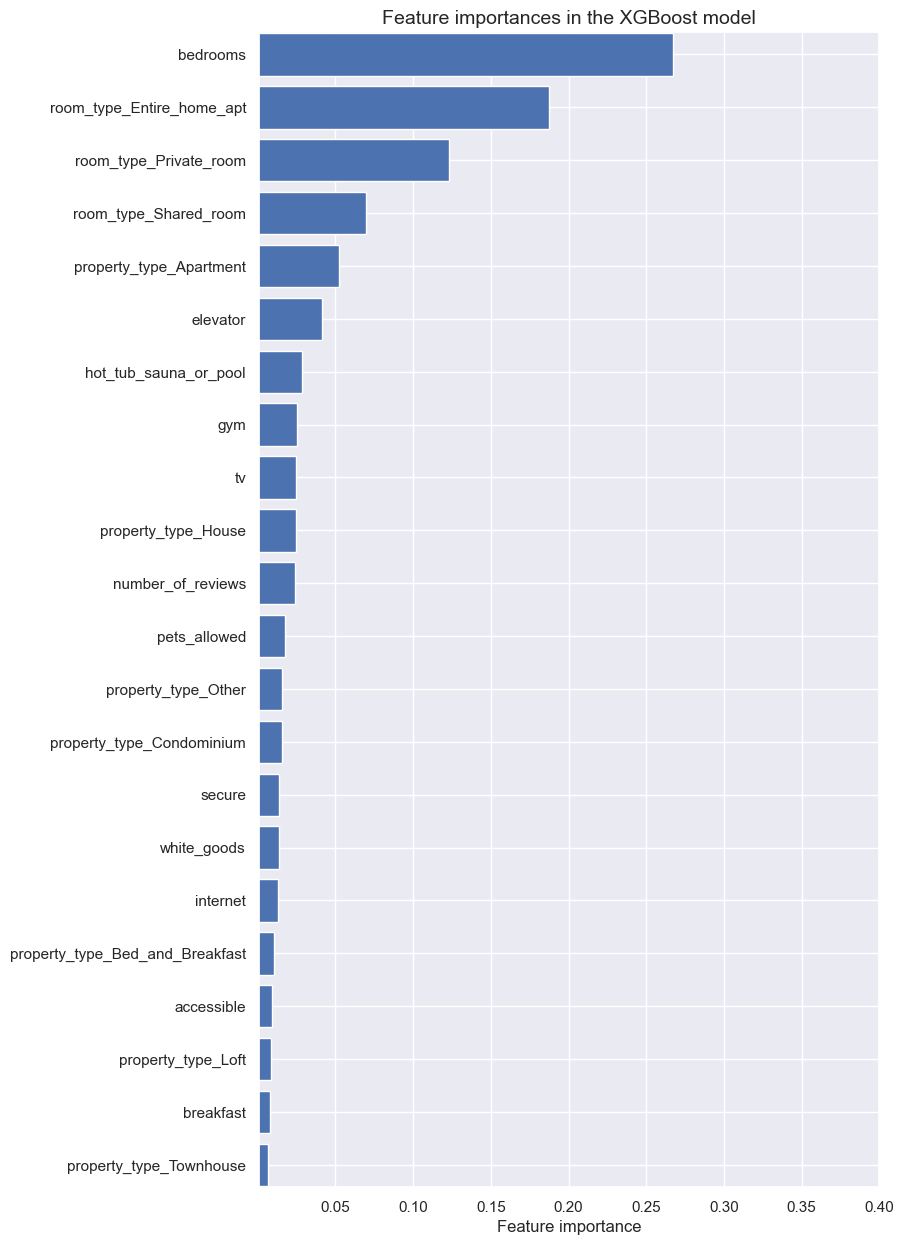

In [41]:
#plotting feature importances
plt.figure(figsize=(8,15))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.001)
plt.xlim(0.001, 0.4)
plt.show()

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

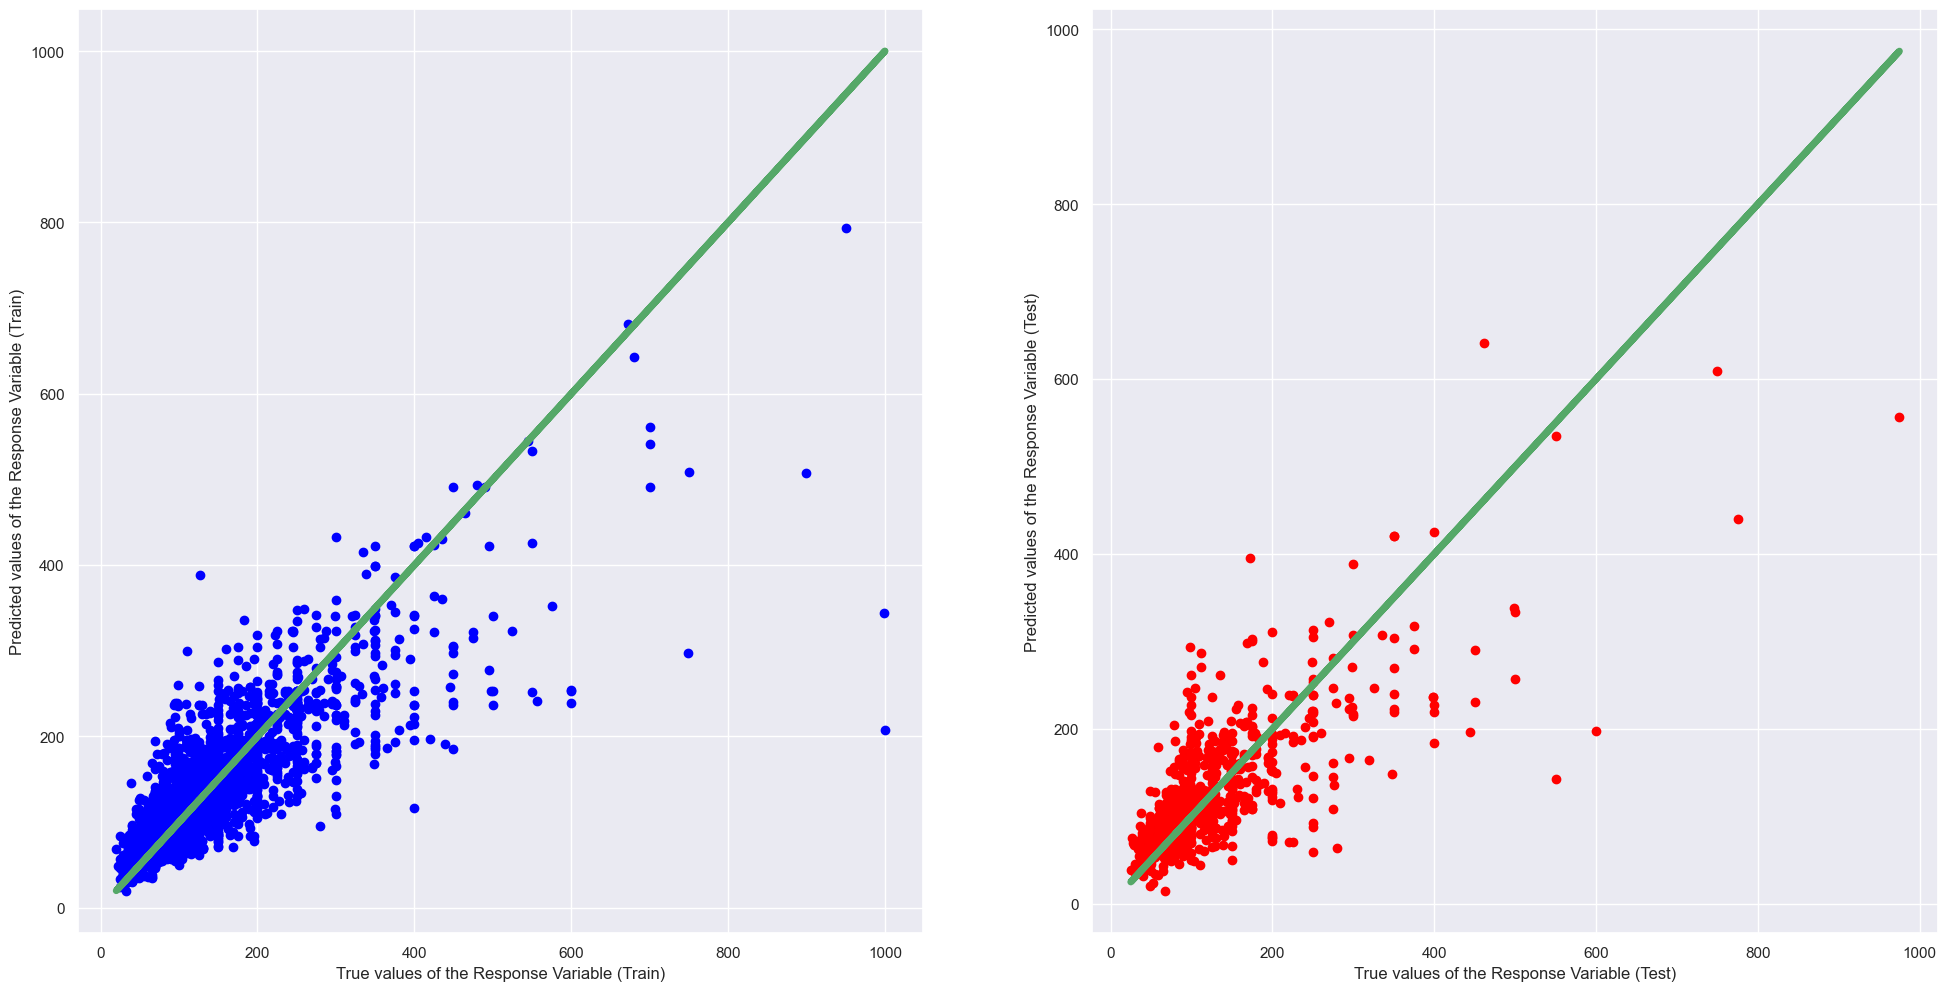

In [42]:
#plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictin_xgb_reg, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictin_xgb_reg, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

**Note that**: Points that lie on or near the diagonal line means that the values predicted by the XGBoost Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

### Model 6: CatBoost 

CatBoost is a high performance open source gradient boosting on decision trees. It can be used to solve both Classification and Regression problems. 

In [39]:
# catBoost = CatBoostRegressor()
# parameters = {'depth'         : [3,5],
#                 'learning_rate' : [0.1,0.5],
#                 'iterations'    : [2000]
#                 }
# grid = GridSearchCV(estimator=catBoost, param_grid = parameters, cv = 2, n_jobs=6)
# grid.fit(X_train, y_train)

# print("\n The best parameters across ALL searched params:\n",
#           grid.best_params_)

To optimize the parameters used in the CatBoost modelling algorithm, we first tune the parameters - in which GridSearchCV was used to optimize the parameters to determine the values that impact the model in order to enable the algorithm to perform at its best. In this case, while we managed to get the optimal parameter values (for at least the more significant parameters), we commented off the code as it would take a decent amount of time to process. The output of the code is as follows:

{'depth': 3, 'iterations': 2000, 'learning_rate': 0.1}

In [43]:
#Creating and fitting the model
CatB=CatBoostRegressor(iterations=2000, depth=3, learning_rate=0.1,loss_function='RMSE')
CatB.fit(X_train, y_train,plot=True);

#Predicting based on the model
trainPrediction_CatB = CatB.predict(X_train)
testPrediction_CatB = CatB.predict(X_test)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 85.8079855	total: 126ms	remaining: 4m 11s
1:	learn: 82.7197846	total: 128ms	remaining: 2m 7s
2:	learn: 79.8810623	total: 129ms	remaining: 1m 26s
3:	learn: 77.4779867	total: 131ms	remaining: 1m 5s
4:	learn: 75.4598411	total: 134ms	remaining: 53.3s
5:	learn: 73.6861490	total: 135ms	remaining: 44.9s
6:	learn: 72.2327800	total: 137ms	remaining: 39s
7:	learn: 71.0027212	total: 138ms	remaining: 34.4s
8:	learn: 69.8904137	total: 140ms	remaining: 30.9s
9:	learn: 68.9424025	total: 141ms	remaining: 28.1s
10:	learn: 68.1473141	total: 143ms	remaining: 25.8s
11:	learn: 67.4927888	total: 146ms	remaining: 24.1s
12:	learn: 66.7983881	total: 147ms	remaining: 22.5s
13:	learn: 66.3151523	total: 149ms	remaining: 21.2s
14:	learn: 65.8074714	total: 151ms	remaining: 19.9s
15:	learn: 65.4076691	total: 153ms	remaining: 18.9s
16:	learn: 65.0593511	total: 154ms	remaining: 18s
17:	learn: 64.7768992	total: 156ms	remaining: 17.2s
18:	learn: 64.4624773	total: 157ms	remaining: 16.4s
19:	learn: 64.2052051	to

(0.001, 20.0)

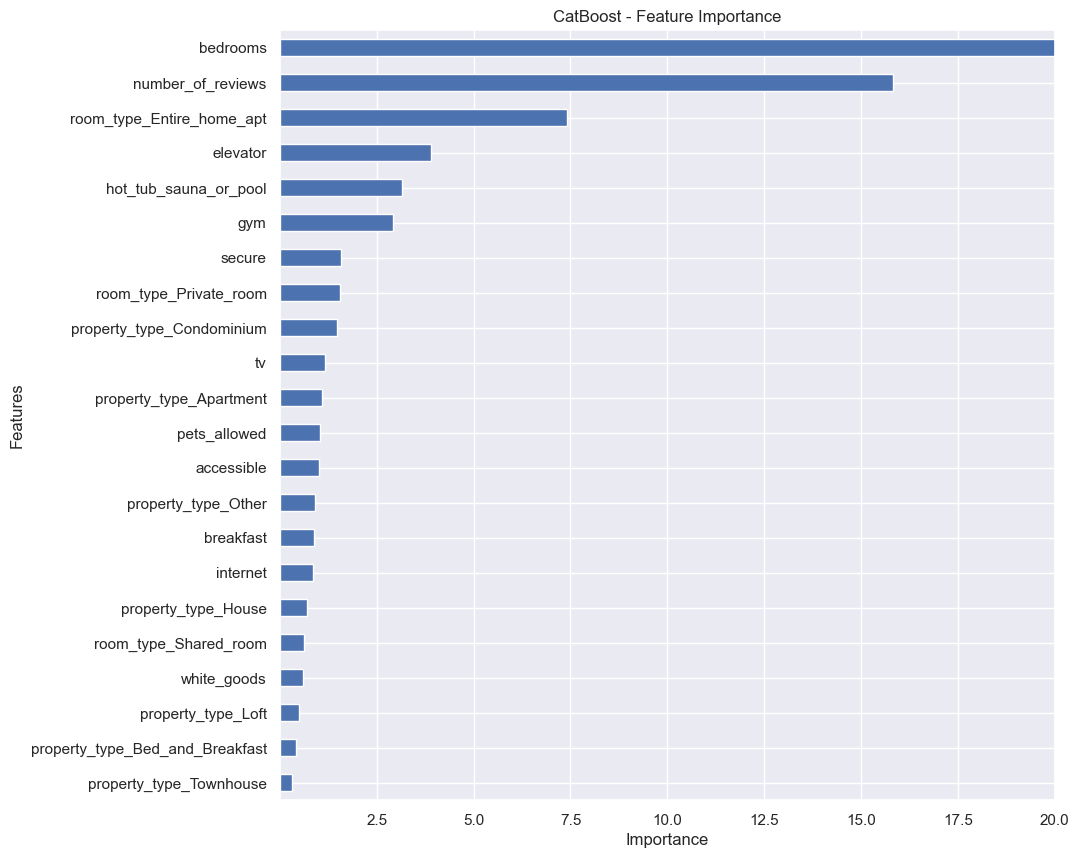

In [44]:
#plotting the feature importance diagram
feature_impCatB = pd.DataFrame({'imp': CatB.feature_importances_, 'col': X.columns})
feature_impCatB = feature_impCatB.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
feature_impCatB.plot(kind='barh', x='col', y='imp', figsize=(10, 10), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');
plt.xlim(0.001, 20.0)

Importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more a variable is used to make key decisions with decision trees, the higher its relative importance.

As such, feature importance can be used to interpret our data to understand the most important features that define our predictions. In this case, looking at the bar chart above, the predictor variable that is associated with a longer bar means that the variable has a higher importance in the CatBoost Regression Model in predicting price. 

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

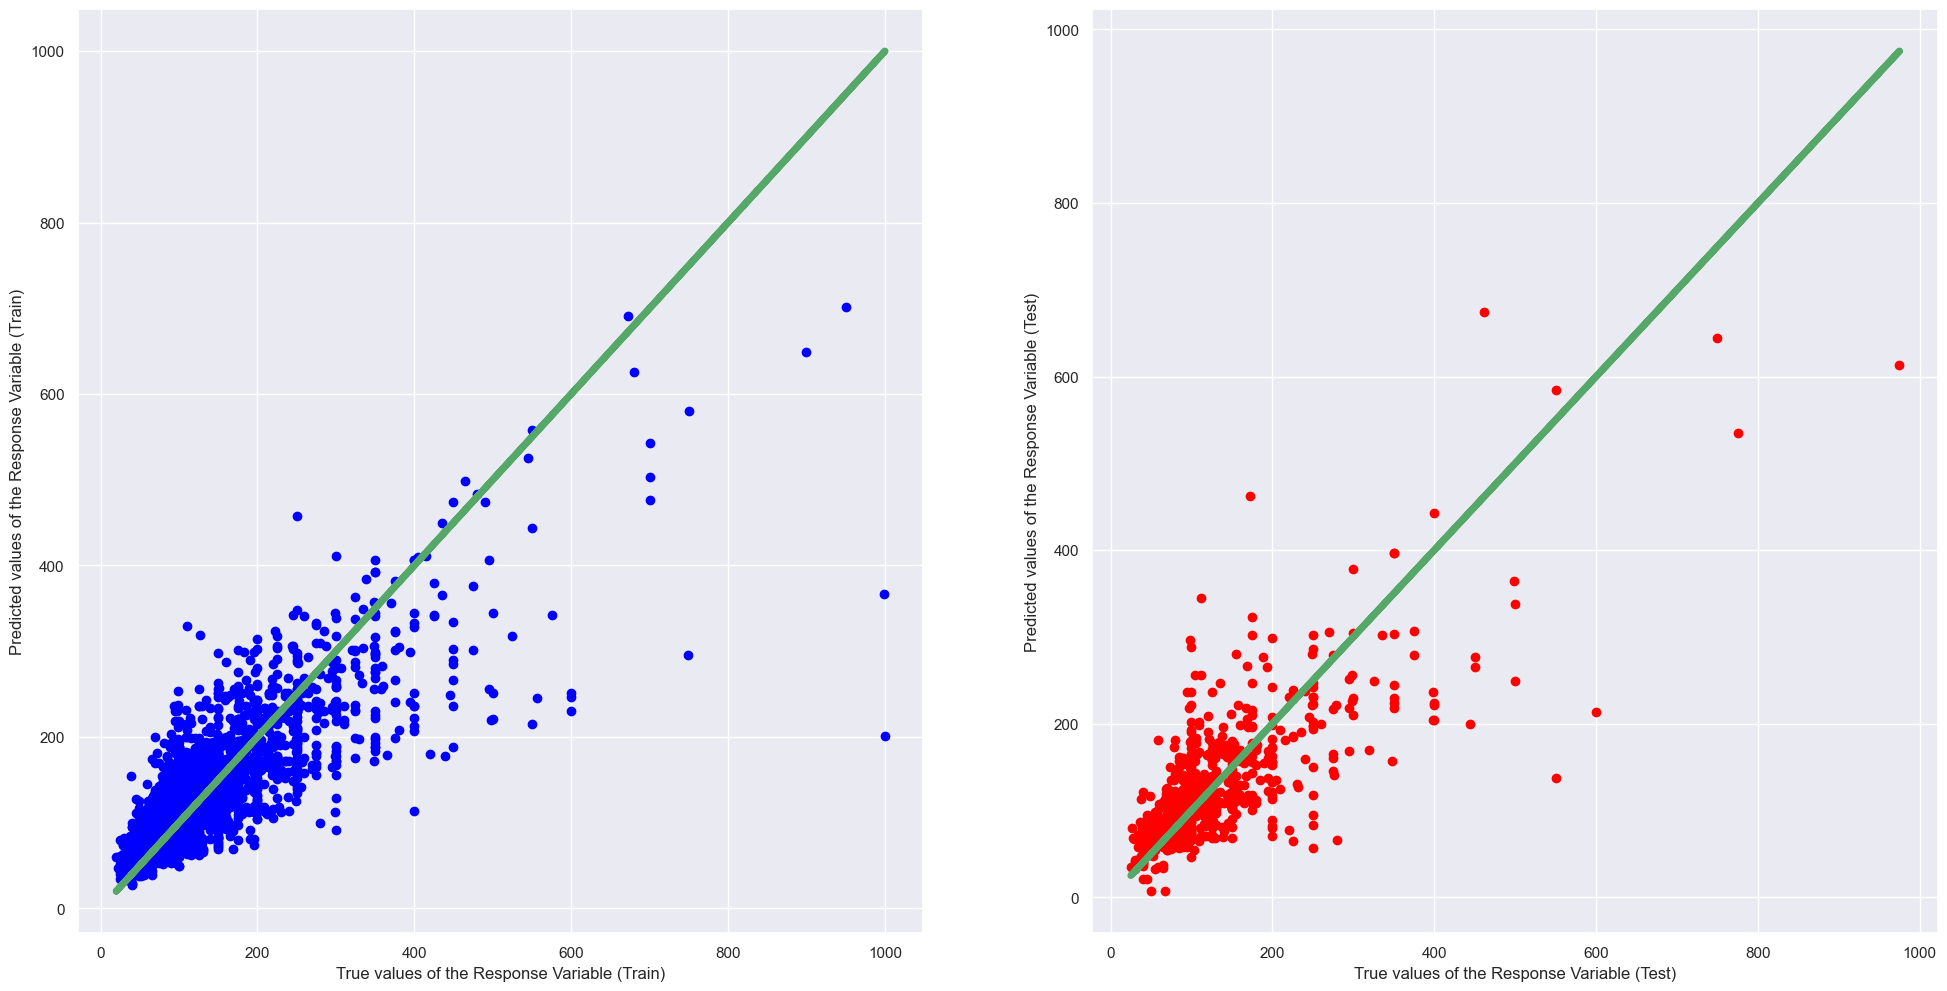

In [45]:
#plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPrediction_CatB, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPrediction_CatB, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

**Note that**: Points that lie on or near the diagonal line means that the values predicted by the CatBoost Regression model are highly accurate. If the points are away from the diagonal line, the points have been wrongly predicted.

### Evaluation of Models

#### Train Test Split
Validation of model performance is done using Train/Test Set Split in which the data set is split into 80% : 20%. 

In [47]:
# Results of Model
print ("Goodness Fit on the Models (Train/Test Split):")
print()
print("Performance Metrics for Test Set")
print("--------------------------------")
print("Linear Regression (MSE):", round(mean_squared_error(y_test, testPredictionLR),4))
print("Linear Regression (R^2):", round(r2_score(y_test, testPredictionLR),4))

print("\nRidge Regression (MSE):", round(mean_squared_error(y_test, testPredictionRidge),4))
print("Ridge Regression (R^2):", round(r2_score(y_test, testPredictionRidge),4))

print("\nLasso Regression (MSE):", round(mean_squared_error(y_test, testPredictionLasso),4))
print("Lasso Regression (R^2):", round(r2_score(y_test, testPredictionLasso),4))

print("\nRandom Forest Regression (MSE):", round(mean_squared_error(y_test, testPredictin_RF),4))
print("Random Forest Regression (R^2):", round(r2_score(y_test, testPredictin_RF),4))

print("\nXGBoost (MSE):", round(mean_squared_error(y_test, testPredictin_xgb_reg),4))
print("XGBoost (R^2):", round(r2_score(y_test, testPredictin_xgb_reg),4))

print("\nCatBoost (MSE):", round(mean_squared_error(y_test, testPrediction_CatB),4))
print("CatBoost (R^2):", round(r2_score(y_test, testPrediction_CatB ),4))


print()
print("\nPerformance Metrics for Train Set")
print("-----------------------------------")
print("Linear Regression (R^2):", round(r2_score(y_train, trainPredictionLR),4))
print("Ridge Regression (R^2):", round(r2_score(y_train, trainPredictionRidge),4))
print("Lasso Regression (R^2):", round(r2_score(y_train, trainPredictionLasso),4))
print("Random Forest Regression (R^2):", round(r2_score(y_train, trainPredictin_RF),4))
print("XGBoost (R^2):", round(r2_score(y_train, trainPredictin_xgb_reg),4))
print("CatBoost (R^2):", round(r2_score(y_train, trainPrediction_CatB ),4))

Goodness Fit on the Models (Train/Test Split):

Performance Metrics for Test Set
--------------------------------
Linear Regression (MSE): 4134.7326
Linear Regression (R^2): 0.5194

Ridge Regression (MSE): 4134.973
Ridge Regression (R^2): 0.5193

Lasso Regression (MSE): 4134.5155
Lasso Regression (R^2): 0.5194

Random Forest Regression (MSE): 4075.4255
Random Forest Regression (R^2): 0.5263

XGBoost (MSE): 3761.1348
XGBoost (R^2): 0.5628

CatBoost (MSE): 3597.064
CatBoost (R^2): 0.5819


Performance Metrics for Train Set
-----------------------------------
Linear Regression (R^2): 0.4999
Ridge Regression (R^2): 0.4999
Lasso Regression (R^2): 0.4999
Random Forest Regression (R^2): 0.5609
XGBoost (R^2): 0.6728
CatBoost (R^2): 0.6707


However, Random Train/Test Set Splits may not always be enough as it can be subjected to selection biased during the split process (even if its randomly split). This is especially so if the dataset is small. Train/Test Set Splits can also cause over-fitted predicted models that can also affect its performance metrics. 

As such, to overcome the pitfalls in Train/Test set split evaluation, k-fold Cross Validation is also performed. Here, the whole dataset is used to calcualte the performance of the regression models. This validation method is more popular simply because it generally results in a less biased or less optimistic estimate of the model. 

#### K-fold Cross Validation

K-Fold Cross Validation is where the dataset will be split into k number of folds in which each fold is used as a testing point.

Here, k=10 is used as it is a value that has been found to generally result in a model skill estimate with low bias and a modest variance. 

In [49]:
from sklearn.model_selection import KFold, cross_validate

kf = KFold(n_splits=10, shuffle=True, random_state=100)

scoring = ['r2', 'neg_mean_squared_error']

results_kfold_LR   = cross_validate(linreg,  X, y, cv=kf, scoring=scoring)
results_kfold_Ridge= cross_validate(ridgeReg,X, y, cv=kf, scoring=scoring)
results_kfold_Lasso= cross_validate(lassoReg,X, y, cv=kf, scoring=scoring)
results_kfold_RF   = cross_validate(RF,      X, y, cv=kf, scoring=scoring)
results_kfold_XGB  = cross_validate(xgb_reg, X, y, cv=kf, scoring=scoring)
results_kfold_CatB = cross_validate(CatB,    X, y, cv=kf, scoring=scoring)

d:\Projects\Airbnb_Seattle\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\Projects\Airbnb_Seattle\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\Projects\Airbnb_Seattle\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
d:\Projects\Airbnb_Seattle\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the

0:	learn: 86.8424106	total: 1.36ms	remaining: 2.72s
1:	learn: 83.6170769	total: 2.64ms	remaining: 2.64s
2:	learn: 80.6741633	total: 3.83ms	remaining: 2.55s
3:	learn: 78.2222074	total: 5.07ms	remaining: 2.53s
4:	learn: 75.9952286	total: 6.44ms	remaining: 2.57s
5:	learn: 74.1341373	total: 7.68ms	remaining: 2.55s
6:	learn: 72.5358374	total: 8.95ms	remaining: 2.55s
7:	learn: 71.3292127	total: 10.2ms	remaining: 2.54s
8:	learn: 70.0664424	total: 11.3ms	remaining: 2.51s
9:	learn: 69.0800005	total: 12.5ms	remaining: 2.5s
10:	learn: 68.2021205	total: 13.8ms	remaining: 2.49s
11:	learn: 67.4762170	total: 15ms	remaining: 2.49s
12:	learn: 66.8696108	total: 16.2ms	remaining: 2.47s
13:	learn: 66.2622468	total: 17.3ms	remaining: 2.46s
14:	learn: 65.7441449	total: 18.6ms	remaining: 2.46s
15:	learn: 65.2674228	total: 20.1ms	remaining: 2.49s
16:	learn: 64.8855924	total: 21.6ms	remaining: 2.52s
17:	learn: 64.5719840	total: 22.9ms	remaining: 2.52s
18:	learn: 64.2529055	total: 24.3ms	remaining: 2.53s
19:	le

In [50]:
print ("Goodness Fit on the Models (K-Fold Cross Validation):")
print()

print("Linear Regression R^2:" , round(results_kfold_LR['test_r2'].mean(),4))
print("Ridge Regression R^2:" , round(results_kfold_Ridge['test_r2'].mean(),4))
print("Lasso Regression R^2:" , round(results_kfold_Lasso['test_r2'].mean(),4))
print("Random Forest R^2:" , round(results_kfold_RF['test_r2'].mean(),4))
print("XGBooost R^2:" , round(results_kfold_XGB['test_r2'].mean(),4))
print("CatBoost R^2:",round(results_kfold_CatB['test_r2'].mean(),4))
print()
print("Linear Regression MSE:" , -round(results_kfold_LR['test_neg_mean_squared_error'].mean(),4))
print("Ridge Regression MSE:" , -round(results_kfold_Ridge['test_neg_mean_squared_error'].mean(),4))
print("Lasso Regression MSE:" , -round(results_kfold_Lasso['test_neg_mean_squared_error'].mean(),4))
print("Random Forest MSE:" , -round(results_kfold_RF['test_neg_mean_squared_error'].mean(),4))
print("XGBooost MSE:" , -round(results_kfold_XGB['test_neg_mean_squared_error'].mean(),4))
print("CatBoost MSE:",-round(results_kfold_CatB['test_neg_mean_squared_error'].mean(),4))

Goodness Fit on the Models (K-Fold Cross Validation):

Linear Regression R^2: 0.496
Ridge Regression R^2: 0.4594
Lasso Regression R^2: 0.472
Random Forest R^2: 0.519
XGBooost R^2: 0.4974
CatBoost R^2: 0.4989

Linear Regression MSE: 4097.8524
Ridge Regression MSE: 4470.1898
Lasso Regression MSE: 4331.607
Random Forest MSE: 3952.6389
XGBooost MSE: 4034.7508
CatBoost MSE: 4010.7019


**Observation**

An interesting observation was that the MSE and R^2 values of the Linear Regression, Ridge Regression and Lasso Regression are very close to each other, this is most probably due to the similarities in the 3 models, as the Ridge and Lasso Regression model are supposed to be an upgraded version of Linear Regression.

### The Most Important Features of a Property Listing

From the evaluation of models, we can see that Random Forest Regression is the best (among all the others) at predicting price. With this information, we do further analysis to find out which feature is the most important. 

We first test out its prediction on a specific instance. Then, using a library called TreeInterpreter, we decompose the Random Forest prediction into a sum of contributions from each feature:

>(Prediction = Bias + Feature1 x Contribution1 + … + FeatureN x ContributionN.) 

This will show us how each individual feature contributed in its prediction based on individual results. A positive result would mean that the feature has a positive impact on the prediction while a negative result shows a negative impact. 

If the prediction of price is fairly accurate (comparing to its true value), then its contributions of individual features would also be deemed fairly reliable.

In [59]:
# If not installed yet:
# !uv pip install treeinterpreter packaging  # or: pip install treeinterpreter packaging

import sys, types

# Provide a minimal compat layer for distutils.version.LooseVersion
try:
    import distutils.version  # will fail on Python 3.12+
except Exception:
    from packaging.version import Version
    m = types.ModuleType("distutils.version")
    class LooseVersion(Version):
        pass
    m.LooseVersion = LooseVersion
    sys.modules["distutils.version"] = m


In [60]:
from treeinterpreter import treeinterpreter as ti
instance = X.iloc[[1235]]
trueInstance = y.iloc[[1235]]
prediction, bias, contributions = ti.predict(RF,instance)

d:\Projects\Airbnb_Seattle\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
d:\Projects\Airbnb_Seattle\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
d:\Projects\Airbnb_Seattle\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
d:\Projects\Airbnb_Seattle\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
d:\Projects\Airbnb_Seattle\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
d:\Projects\Airbnb_Seattl

In [62]:
for i in range(len(instance)):
    print("True Value:",trueInstance['price']) 
    print()
    print("Prediction:", prediction)
    print()
    print ("Feature contributions:")
    print ("-"*25)
    for c, feature in sorted(zip(contributions[i], 
                                 X.columns), 
                             key=lambda x: -abs(x[0])):
        print (feature, round(c, 4))

True Value: 1235    150
Name: price, dtype: int64

Prediction: [[150.90386895]]

Feature contributions:
-------------------------
bedrooms -24.6588
hot_tub_sauna_or_pool 16.3218
gym 11.8336
room_type_Entire_home_apt 10.8972
room_type_Private_room 6.6388
elevator 6.5324
white_goods -2.9243
tv 2.7143
property_type_Apartment -2.2422
secure -1.9984
number_of_reviews -1.744
property_type_House -1.3987
accessible 1.2806
room_type_Shared_room 0.7168
pets_allowed 0.5152
internet 0.1409
breakfast 0.0932
property_type_Townhouse -0.075
property_type_Condominium -0.0645
property_type_Other 0.0261
property_type_Loft 0.0246
property_type_Bed_and_Breakfast -0.004


In this case as seen above, the predicted value of instance 1235 is a very decently good prediction of its true value (150.86 vs 150). As such, if we look at the feature contributions, having amenities such as a hot tub/sauna/pool, gym or elevator is important in influencing price.

To explain why 'bedrooms' has such a negative contribution (even though from previous analysis, it has shown that it is a great impacter), it is because for this particular instance, the bedroom is valued at 0. As such, it can be said that while bedroom is at a negative contribution value, it is still one of the most important feature of a property listing. 

**Conclusion**

From the information above, by comparing the MSE (for test sets) and R^2 (for train sets) of the different models (in which the lower the MSE & higher the R^2 is, the more accurate it is), we can see which regression model is the best at predicting the price of a listing based on room_type, property_type, bedrooms, amenities and number_of_reviews.

As seen from both validation methods, we can see that Random Forest Regression showed the best results, with the highest R^2 value and the lowest MSE value.

The different graphs of True Values VS Predicting Values for each regression model (can be seen under the heading of the different models) can also give us a rough idea on which model is best at predicting. As such, our conclusion above can be said true as the graph of the Random Forest Regression generally has the most number of points situated near the diagonal line.

## Answering the Problem

From all the analysis done, we can confidently answer our initial question of the factors that make a listing more expensive. An aspiring AirBnb host, if investing on a new property in Seattle, should focus on the following factors to maximize the price of his listing. Additionally a traveller who wants to pay the lowest possible price for a listing might want to avoid having these features in his prospective housing :

- Entire properties listed instead of just a single room fetch the highest prices.
- Apartment and landed house tend to be the most expensive and the most abundant properties in AirBnb.
- The more bedrooms a property has, the higher its price. The highest prices are fetched by 6 room properties.
- There are plenty of listings in 'Belltown' or 'West Queen Anne' and they tend to be expensive.
- Words like: 'view', 'modern' & 'walk' all frequently appear in the summary of the more expensive listing.
- Ammenities such as: 'Washer', Dryer', 'Heating', 'Wireless Internet', 'Smoke Detector', 'Free Parking', 'Kid Friendly', 'TV', 'HotTub/Sauna/Pool', 'Gyms' and 'Elevators' are all common among the more expensive listings.
- The reviews a listing gets (quality or quantity) does not have much of an impact in its price.